<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Projet-7:-Implémentez-un-modèle-de-scoring-(Part2)" data-toc-modified-id="Projet-7:-Implémentez-un-modèle-de-scoring-(Part2)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Projet 7: Implémentez un modèle de scoring (Part2)</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#import-libraries" data-toc-modified-id="import-libraries-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>import libraries</a></span></li><li><span><a href="#constantes" data-toc-modified-id="constantes-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>constantes</a></span></li><li><span><a href="#Fonctions" data-toc-modified-id="Fonctions-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>Fonctions</a></span></li></ul></li><li><span><a href="#Réception-des-données" data-toc-modified-id="Réception-des-données-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Réception des données</a></span><ul class="toc-item"><li><span><a href="#Lecture-des-fichiers-et-affichage-caractéristiques" data-toc-modified-id="Lecture-des-fichiers-et-affichage-caractéristiques-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Lecture des fichiers et affichage caractéristiques</a></span></li><li><span><a href="#Réduction-taille-des-dataframes" data-toc-modified-id="Réduction-taille-des-dataframes-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Réduction taille des dataframes</a></span></li><li><span><a href="#préparation-des-données" data-toc-modified-id="préparation-des-données-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>préparation des données</a></span></li></ul></li><li><span><a href="#pré-sélection-des-modèles" data-toc-modified-id="pré-sélection-des-modèles-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>pré-sélection des modèles</a></span><ul class="toc-item"><li><span><a href="#Split-des-données" data-toc-modified-id="Split-des-données-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Split des données</a></span></li><li><span><a href="#Entraînement-des-modèles" data-toc-modified-id="Entraînement-des-modèles-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Entraînement des modèles</a></span></li><li><span><a href="#Affichage-des-résultats" data-toc-modified-id="Affichage-des-résultats-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Affichage des résultats</a></span></li></ul></li><li><span><a href="#Sélection-parmi-les-meilleurs-modèles" data-toc-modified-id="Sélection-parmi-les-meilleurs-modèles-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Sélection parmi les meilleurs modèles</a></span><ul class="toc-item"><li><span><a href="#Xgboost" data-toc-modified-id="Xgboost-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Xgboost</a></span></li><li><span><a href="#LGBM" data-toc-modified-id="LGBM-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>LGBM</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#comparaison-des-modèles" data-toc-modified-id="comparaison-des-modèles-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>comparaison des modèles</a></span></li><li><span><a href="#Détermination-du-meilleur-seuil-avec-le-meilleur-modèle" data-toc-modified-id="Détermination-du-meilleur-seuil-avec-le-meilleur-modèle-1.3.5"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span>Détermination du meilleur seuil avec le meilleur modèle</a></span></li></ul></li><li><span><a href="#Interprétabilité-du-modèle-sélectionné" data-toc-modified-id="Interprétabilité-du-modèle-sélectionné-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Interprétabilité du modèle sélectionné</a></span></li><li><span><a href="#Exportation-jeux-de-tests-et-modèle" data-toc-modified-id="Exportation-jeux-de-tests-et-modèle-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Exportation jeux de tests et modèle</a></span></li></ul></li></ul></div>

# Projet 7: Implémentez un modèle de scoring (Part2)

### import libraries

In [1]:
from pyforest import *
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

### constantes

In [2]:
# Definitions of constants
DATA_FILE = ["f_train_model.csv",
             "f_test_model.csv"]

df_train_model_i = pd.DataFrame()
df_test_model_i = pd.DataFrame()

DATA_FRAME_I  = {"df_train_model_i" : df_train_model_i,
                  "df_test_model_i" : df_test_model_i}


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
MODELSSCORING = [ ("LogReg", LogisticRegression()), 
                  ("RF", RandomForestClassifier()),
                  ("KNN", KNeighborsClassifier()),
                  ("SVM", LinearSVC()), 
                  ("XGB", xgb.XGBClassifier()),
                  ("LGBM", lgb.LGBMClassifier())
                ]

METRICSCORING = {'precision': "precision",
                   'recall': "recall",
                   'f1': "f1",
                   'roc_auc': 'roc_auc'
                   }

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
COLTRAINMET = ["train_precision","train_recall","train_f1","train_roc_auc","train_score_jps"]
COLTESTMET = ["test_precision","test_recall","test_f1","test_roc_auc","test_score_jps"]
COLTIMEMET = ["fit_time","score_time"]
COLVALIDMET = ["valid_precision","valid_recall","valid_F1","valid_Roc","valid_Score_JPS"]

In [5]:
space_xgb = {
                'max_depth' : hp.choice('max_depth', range(5, 30, 1)),
                'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.01),
                'n_estimators' : hp.choice('n_estimators', range(20, 205, 5)),
                'gamma' : hp.quniform('gamma', 0, 0.50, 0.01),
                'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
                'subsample' : hp.quniform('subsample', 0.1, 1, 0.01),
                'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.01)
            }

In [6]:
space_lgbm = {
                'max_depth' : hp.choice('max_depth', range(5, 30, 1)),
                'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.01),
                'num_leaves': hp.quniform('num_leaves', 30, 150, 1),
                'n_estimators' : hp.choice('n_estimators', range(20, 205, 5)),
                'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
                'subsample' : hp.quniform('subsample', 0.1, 1, 0.01),
                'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.01)
            }

In [7]:
space_RF = {'max_depth': hp.choice('max_depth', range(10,100)),
            'max_features': hp.uniform('max_features', 0.1,1),
            'n_estimators': hp.choice('n_estimators', range(50,500)),
            'min_samples_leaf': hp.choice('min_samples_leaf',range(3,5)),
            'min_samples_split': hp.choice('min_samples_split',range(2,10)),
            'criterion': hp.choice('criterion', ["gini", "entropy"])}

### Fonctions

In [8]:
def detcrit(ival):
    if ival == 1:
        ocritere = "entropy"
    else:
        ocritere = "gini"
    
    return ocritere

In [9]:
# Create custom metric
def custom_metric(y_test, y_pred):
    # use confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()    
    metpers = (0.8*tn + 0.5*tp - 0.1*fn - 0.8*fp)/(tn + fp + fn + tp)
    
    return metpers

In [10]:
def run_exps(X_train, y_train, X_valid, y_valid,imodels,iscoring_dic,itarget_names):
    
    dfs = []     
    dfech = []
    #names = []    
    for name, model in imodels:
        this_dfech = []
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = cross_validate(model, X_train, y_train, cv=skf, scoring=iscoring_dic,return_train_score=True)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_valid)
        print(name)
        print(classification_report(y_valid, y_pred,target_names=itarget_names))
        this_df = pd.DataFrame(cv_results)
        this_df["model"] = name  
        dfs.append(this_df)
        
        final = pd.concat(dfs, ignore_index=True)
        #calcul métrique échantillon
        this_dfech.append(name)
        this_dfech.append(precision_score(y_valid, y_pred))
        this_dfech.append(recall_score(y_valid, y_pred))
        this_dfech.append(f1_score(y_valid, y_pred))
        
        if name == "SVM":
            this_dfech.append(roc_auc_score(y_valid, clf.decision_function(X_valid)))
        else:
            this_dfech.append(roc_auc_score(y_valid, clf.predict_proba(X_valid)[:, 1]))
        this_dfech.append(custom_metric(y_valid, y_pred))
        #print(this_dfech)
        dfech.append(this_dfech)
        #print(dfech)
        
    final_ech = pd.DataFrame(dfech,columns=["model","valid_precision","valid_recall","valid_F1","valid_Roc","valid_Score_JPS"])
    final_ech.set_index("model",inplace = True)
    
    return final,final_ech

In [11]:
def Give_Results(idf,idf_ech,iname):
    
    idf = idf.round(2)
    idf_ech = idf_ech.round(2)
    
    final_met_train = idf.groupby(["model"])[COLTRAINMET].agg([np.mean])
    final_met_train.columns = COLTRAINMET

    final_met_test = idf.groupby(["model"])[COLTESTMET].agg([np.mean])
    final_met_test.columns = COLTESTMET

    final_time = idf.groupby(["model"])[COLTIMEMET].agg([np.mean])
    final_time.columns = COLTIMEMET
    
    tp.GiveResults(iname + " (Données d'entraînement)",final_met_train)
    tp.GiveResults(iname + " (Données de validation)",final_met_test)
    tp.GiveResults(iname + " (Données de test)",idf_ech)
    tp.GiveResults(iname + " (temps d'exécution)",final_time)
    
    tp.MetricPlot(final_met_train, COLTRAINMET, "Scores par modèle (données de Training)", "modèles","métriques")
    tp.MetricPlot(final_met_test, COLTESTMET, "Scores par modèle (données de tests)", "modèles","métriques")
    tp.MetricPlot(final_ech, COLVALIDMET, "Scores par modèle (données de validation)", "modèles","métriques")
    tp.MetricPlot(final_time, COLTIMEMET, "Scores par modèle (Temps d'exécution)", "modèles","métriques")

In [12]:
def Prepare_data(X_train, y_train, X_test, y_test,balance):
    std_scale = StandardScaler().fit(X_train)
    x_train_std = std_scale.transform(X_train)
    x_valid_std = std_scale.transform(X_test)
    oversample = balance
    x_train_bal, y_train_bal = oversample.fit_sample(x_train_std, y_train)
    return x_train_bal, y_train_bal,x_valid_std, y_test

In [13]:
def ABS_SHAP(df_shap,df,name_idx,nbvar):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop(name_idx,axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')

    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True).tail(nbvar)
    
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(30,30),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)",fontsize=20)
    ax.set_ylabel("features",fontsize=20)

## Réception des données

### Lecture des fichiers et affichage caractéristiques

In [14]:
warnings.filterwarnings('ignore')
shap.initjs()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
i = 0
for df in DATA_FRAME_I.keys():
    DATA_FRAME_I[df] = pd.read_csv(DATA_FILE[i], delimiter=",", na_values=['-'], encoding = "utf-8", low_memory=False)
    i = i +1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
# Compute number of rows and columns
for df in DATA_FRAME_I.keys():
    print("Dataframe {} | {} lignes | {} colonnes | {} % zones non nulles | {} gb taille mémoire".format(df,DATA_FRAME_I[df].shape[0],
                                                                                                     DATA_FRAME_I[df].shape[1],
                                                                                                     str(tp.calc_filled_cells(DATA_FRAME_I[df])),
                                                                                                     tp.return_size(DATA_FRAME_I[df])
                                                                                                    ))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Dataframe df_train_model_i | 307511 lignes | 153 colonnes | 100.0 % zones non nulles | 0.38 gb taille mémoire


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Dataframe df_test_model_i | 48744 lignes | 152 colonnes | 100.0 % zones non nulles | 0.06 gb taille mémoire


### Réduction taille des dataframes

In [17]:
for df in DATA_FRAME_I.keys():
    DATA_FRAME_I[df] = tp.convert_types(DATA_FRAME_I[df],df,"SK_ID",1,0)    

<IPython.core.display.Javascript object>

df_train_model_i | Taille mémoire originale : 0.38 gb | Nouvelle Taille mémoire : 0.19 gb.


<IPython.core.display.Javascript object>

df_test_model_i | Taille mémoire originale : 0.06 gb | Nouvelle Taille mémoire : 0.03 gb.


### préparation des données

In [18]:
DATA_FRAME_I["df_train_model_i"] = DATA_FRAME_I["df_train_model_i"].rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
DATA_FRAME_I["df_test_model_i"] = DATA_FRAME_I["df_test_model_i"].rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
df_train_labels = DATA_FRAME_I["df_train_model_i"]["TARGET"]
DATA_FRAME_I["df_train_model_i"] = DATA_FRAME_I["df_train_model_i"].drop(columns = "TARGET")
DATA_FRAME_I["df_train_model_i"].set_index("SK_ID_CURR" , inplace = True)
DATA_FRAME_I["df_test_model_i"].set_index("SK_ID_CURR" , inplace = True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## pré-sélection des modèles

### Split des données

In [19]:
# split number 1
x_train, x_test, y_train, y_test = train_test_split(DATA_FRAME_I["df_train_model_i"], df_train_labels, train_size = 0.8,stratify=df_train_labels)
# split number 2
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.1,stratify=y_train)
# split number 3
x_train_ech, x_valid_int, y_train_ech, y_valid_int = train_test_split(x_train, y_train, train_size = 0.2,stratify=y_train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
x_train_sm, y_train_sm, x_valid_sm, y_valid_sm = Prepare_data(x_train_ech,y_train_ech,x_valid,y_valid,SMOTE())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Entraînement des modèles

In [22]:
METRICSCORING["score_jps"] = make_scorer(custom_metric, greater_is_better=True) 

<IPython.core.display.Javascript object>

In [23]:
final,final_ech = run_exps(x_train_sm,y_train_sm, x_valid_sm,  y_valid_sm,MODELSSCORING,METRICSCORING,['No problem', 'payment difficulties'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

LogReg


<IPython.core.display.Javascript object>

                      precision    recall  f1-score   support

          No problem       0.96      0.70      0.81     22615
payment difficulties       0.16      0.66      0.26      1986

            accuracy                           0.70     24601
           macro avg       0.56      0.68      0.54     24601
        weighted avg       0.90      0.70      0.77     24601



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RF


<IPython.core.display.Javascript object>

                      precision    recall  f1-score   support

          No problem       0.92      1.00      0.96     22615
payment difficulties       0.31      0.01      0.03      1986

            accuracy                           0.92     24601
           macro avg       0.62      0.51      0.49     24601
        weighted avg       0.87      0.92      0.88     24601



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN


<IPython.core.display.Javascript object>

                      precision    recall  f1-score   support

          No problem       0.94      0.49      0.64     22615
payment difficulties       0.10      0.64      0.17      1986

            accuracy                           0.50     24601
           macro avg       0.52      0.56      0.41     24601
        weighted avg       0.87      0.50      0.61     24601



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

SVM


<IPython.core.display.Javascript object>

                      precision    recall  f1-score   support

          No problem       0.96      0.69      0.80     22615
payment difficulties       0.16      0.67      0.26      1986

            accuracy                           0.69     24601
           macro avg       0.56      0.68      0.53     24601
        weighted avg       0.90      0.69      0.76     24601



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

XGB


<IPython.core.display.Javascript object>

                      precision    recall  f1-score   support

          No problem       0.92      0.99      0.96     22615
payment difficulties       0.35      0.05      0.08      1986

            accuracy                           0.92     24601
           macro avg       0.63      0.52      0.52     24601
        weighted avg       0.88      0.92      0.89     24601



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

LGBM


<IPython.core.display.Javascript object>

                      precision    recall  f1-score   support

          No problem       0.92      1.00      0.96     22615
payment difficulties       0.45      0.03      0.05      1986

            accuracy                           0.92     24601
           macro avg       0.68      0.51      0.50     24601
        weighted avg       0.88      0.92      0.88     24601



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Affichage des résultats

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

+--------------------------------------------------------------------------------------+
|                  Modèles avec échantillons (Données d'entraînement)                  |
+--------+-----------------+--------------+----------+---------------+-----------------+
| model  | train_precision | train_recall | train_f1 | train_roc_auc | train_score_jps |
+--------+-----------------+--------------+----------+---------------+-----------------+
|  KNN   |       0.71      |     1.0      |   0.83   |      1.0      |       0.32      |
|  LGBM  |       1.0       |     0.92     |   0.96   |      0.99     |       0.62      |
| LogReg |       0.71      |     0.74     |   0.73   |      0.78     |       0.33      |
|   RF   |       1.0       |     1.0      |   1.0    |      1.0      |       0.65      |
|  SVM   |       0.71      |     0.74     |   0.73   |      0.78     |       0.33      |
|  XGB   |       1.0       |     0.95     |   0.97   |      1.0      |       0.63      |
+--------+-----------

<IPython.core.display.Javascript object>

+---------------------------------------------------------------------------------+
|                Modèles avec échantillons (Données de validation)                |
+--------+----------------+-------------+---------+--------------+----------------+
| model  | test_precision | test_recall | test_f1 | test_roc_auc | test_score_jps |
+--------+----------------+-------------+---------+--------------+----------------+
|  KNN   |      0.65      |     1.0     |   0.79  |     0.91     |      0.22      |
|  LGBM  |      1.0       |     0.91    |   0.95  |     0.98     |      0.62      |
| LogReg |      0.71      |     0.74    |   0.72  |     0.78     |      0.33      |
|   RF   |      1.0       |     0.93    |   0.96  |     0.99     |      0.63      |
|  SVM   |      0.71      |     0.75    |   0.73  |     0.78     |      0.33      |
|  XGB   |      0.99      |     0.92    |   0.95  |     0.98     |      0.62      |
+--------+----------------+-------------+---------+--------------+----------

<IPython.core.display.Javascript object>

+----------------------------------------------------------------------------------+
|                   Modèles avec échantillons (Données de test)                    |
+--------+-----------------+--------------+----------+-----------+-----------------+
| model  | valid_precision | valid_recall | valid_F1 | valid_Roc | valid_Score_JPS |
+--------+-----------------+--------------+----------+-----------+-----------------+
| LogReg |       0.16      |     0.66     |   0.26   |    0.74   |       0.32      |
|   RF   |       0.31      |     0.01     |   0.03   |    0.72   |       0.72      |
|  KNN   |       0.1       |     0.64     |   0.17   |    0.59   |       0.01      |
|  SVM   |       0.16      |     0.67     |   0.26   |    0.74   |       0.3       |
|  XGB   |       0.35      |     0.05     |   0.08   |    0.72   |       0.72      |
|  LGBM  |       0.45      |     0.03     |   0.05   |    0.75   |       0.72      |
+--------+-----------------+--------------+----------+-----------

<IPython.core.display.Javascript object>

+-----------------------------------------------+
| Modèles avec échantillons (temps d'exécution) |
+------------+---------------+------------------+
|   model    |    fit_time   |    score_time    |
+------------+---------------+------------------+
|    KNN     |      0.05     |      44.46       |
|    LGBM    |      5.49     |       0.17       |
|   LogReg   |      1.55     |       0.05       |
|     RF     |      31.6     |       0.7        |
|    SVM     |     37.21     |       0.04       |
|    XGB     |     32.88     |       0.25       |
+------------+---------------+------------------+


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

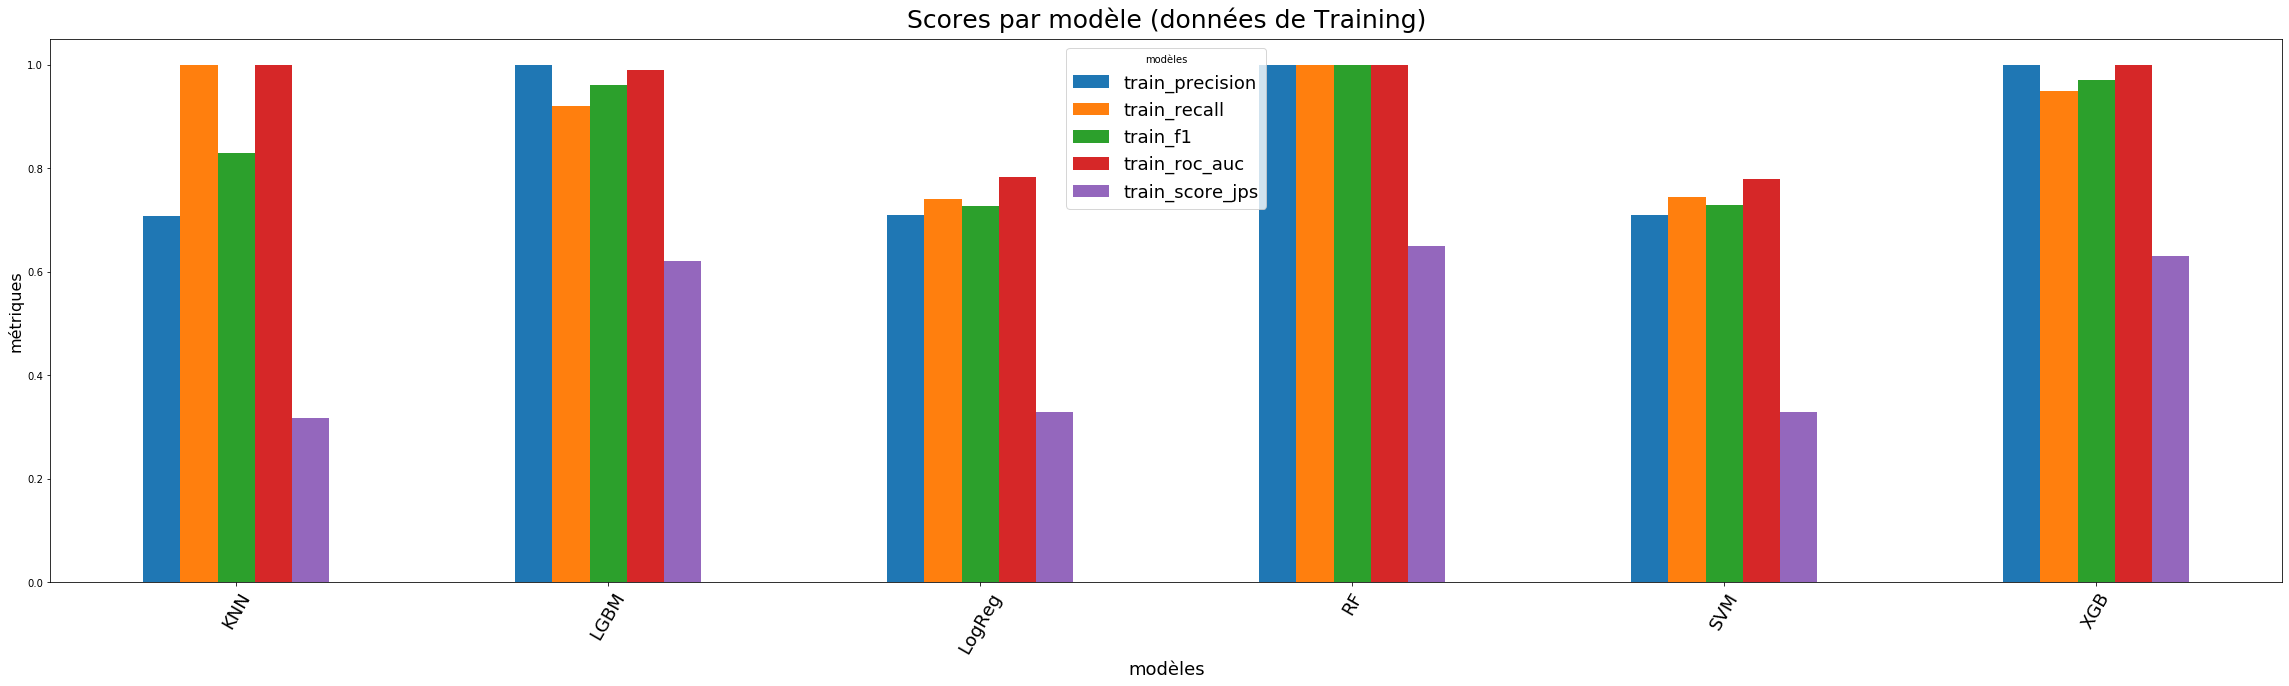

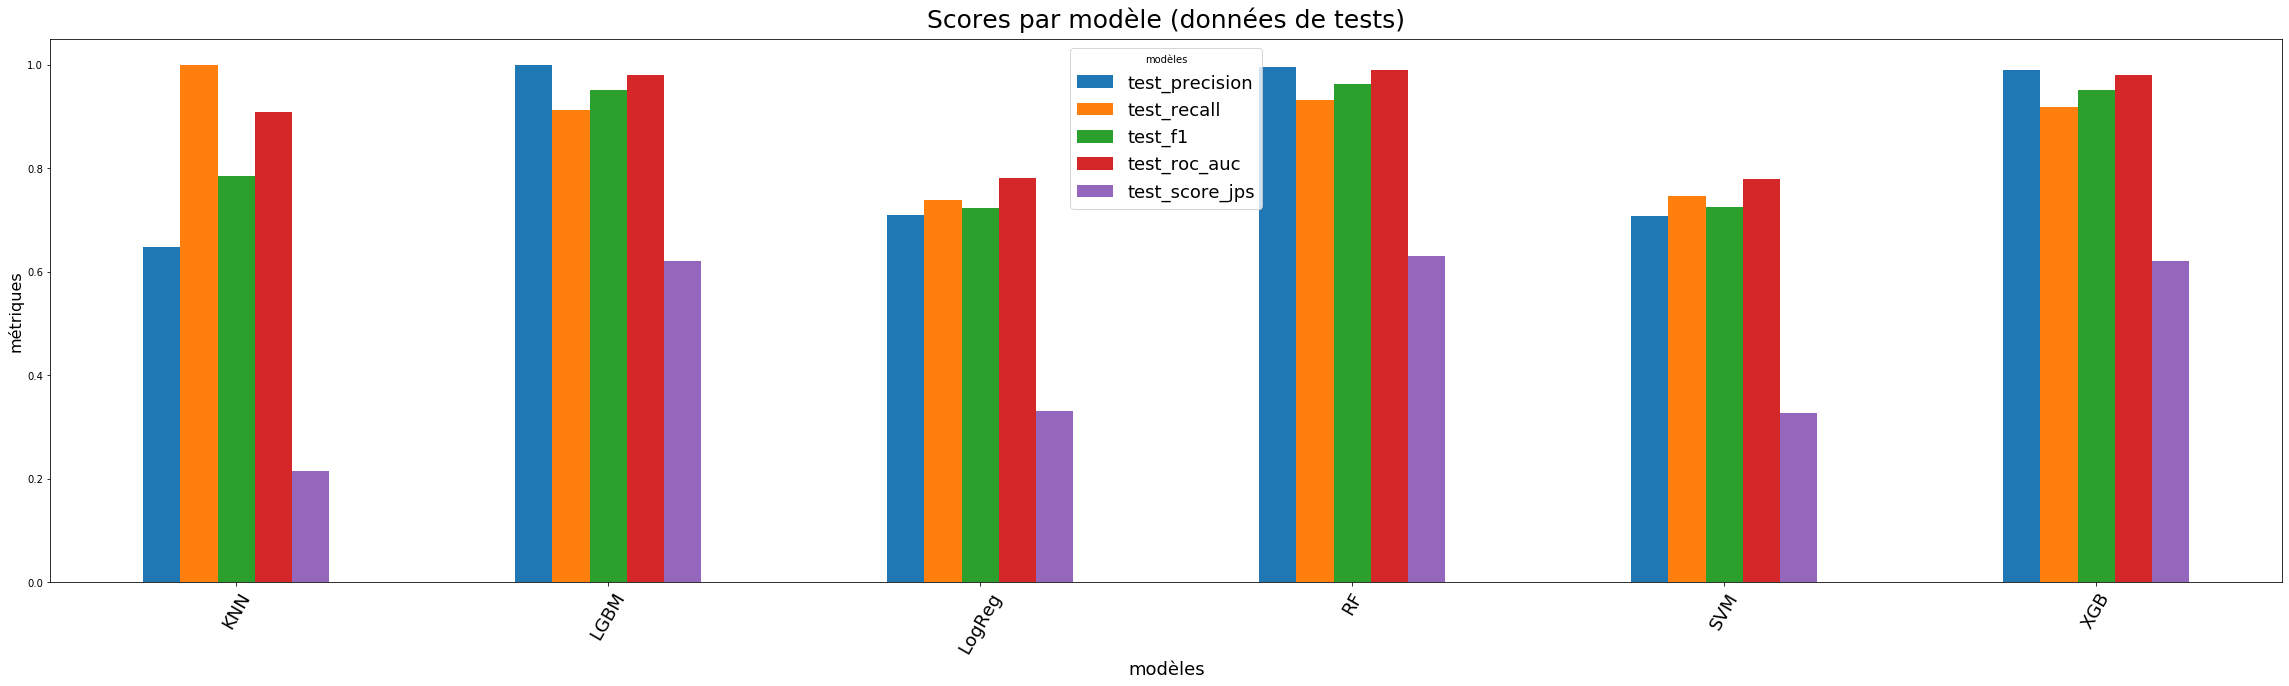

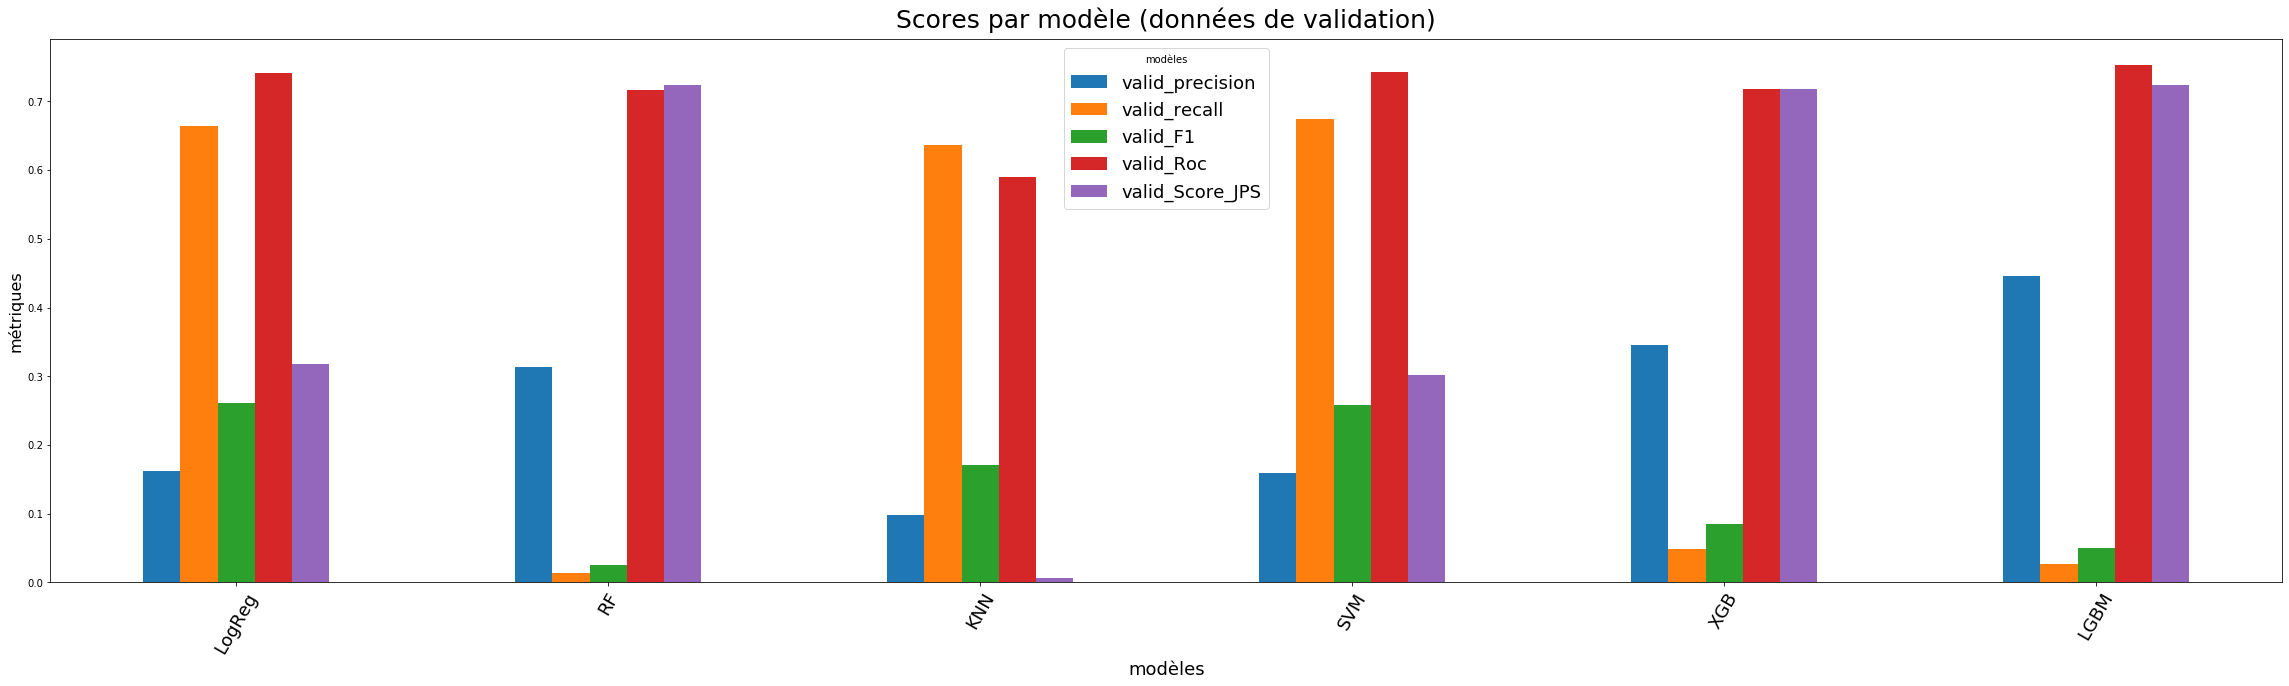

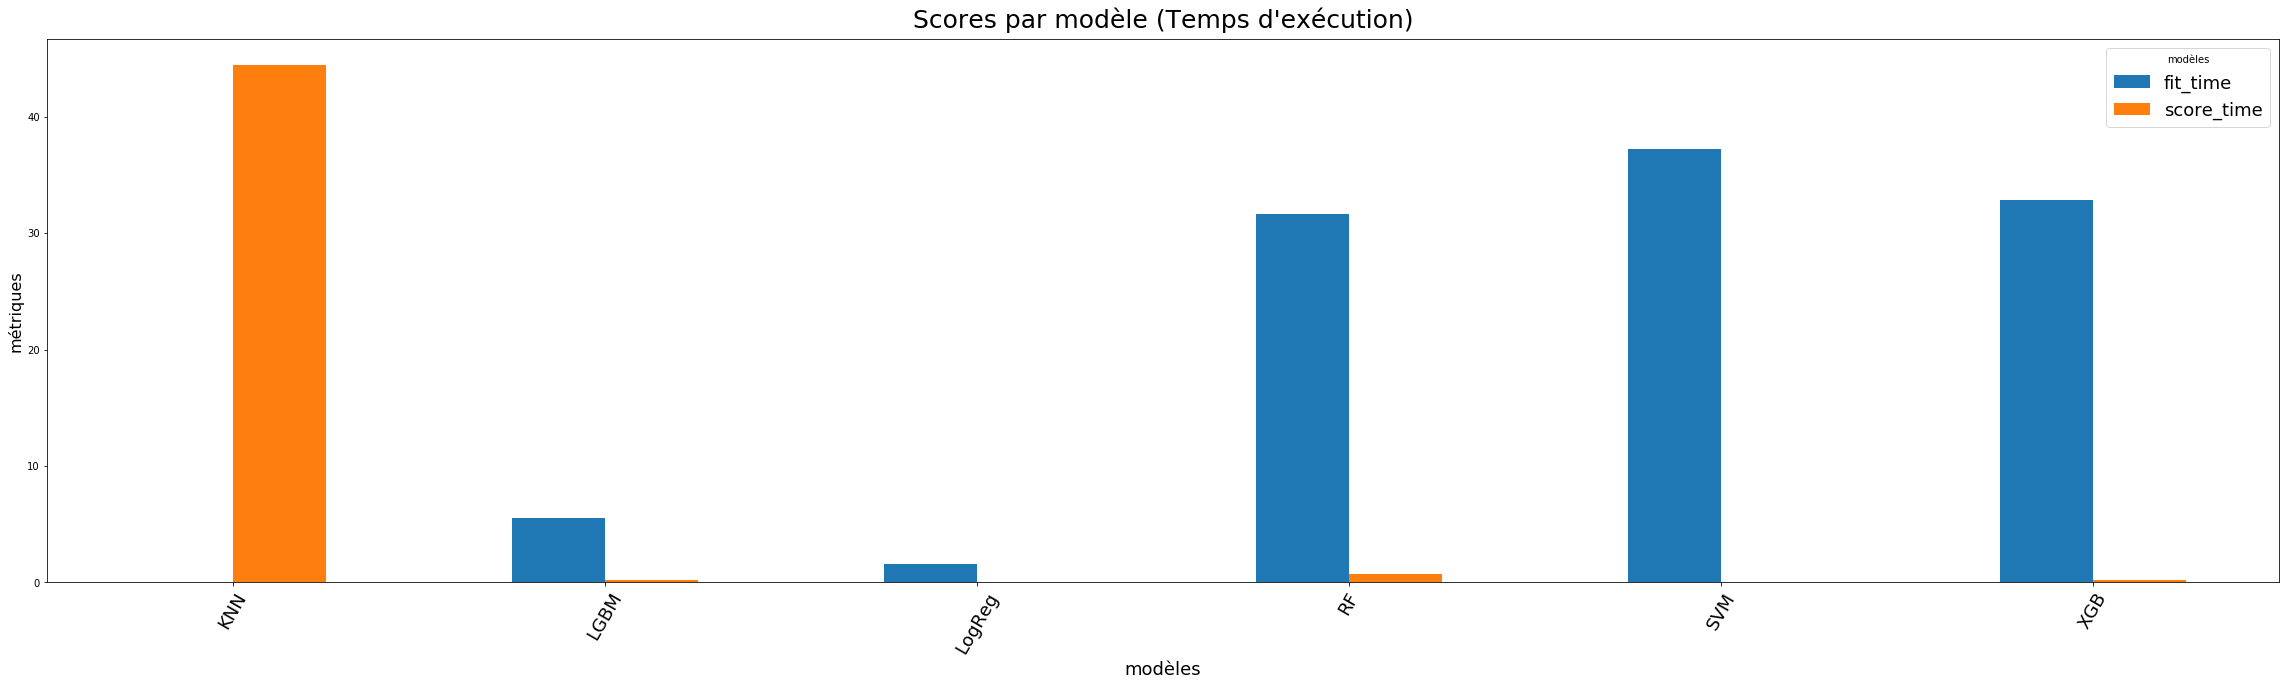

In [24]:
Give_Results(final,final_ech,"Modèles avec échantillons")

## Sélection parmi les meilleurs modèles

In [21]:
# split number 1
x_train, x_test, y_train, y_test = train_test_split(DATA_FRAME_I["df_train_model_i"], df_train_labels, train_size = 0.8,stratify=df_train_labels)
# split number 2
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.3,stratify=y_train)
# split number 3
x_train_ech, x_valid_int, y_train_ech, y_valid_int = train_test_split(x_train, y_train, train_size = 0.2,stratify=y_train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
x_train_sel, y_train_sel, x_valid_sel, y_valid_sel = Prepare_data(x_train_ech,y_train_ech,x_valid,y_valid,SMOTE())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
score_jps = make_scorer(custom_metric, greater_is_better=True) 

<IPython.core.display.Javascript object>

### Xgboost

In [24]:
def objective_xgb(space):
    params = {'n_estimators' : space['n_estimators'],
                'max_depth' : int(space['max_depth']),
                'learning_rate' : space['learning_rate'],
                'gamma' : space['gamma'],
                'min_child_weight' : space['min_child_weight'],
                'subsample' : space['subsample'],
                'colsample_bytree' : space['colsample_bytree']}
    clf=xgb.XGBClassifier(**params)
    
    clf.fit(x_train_sel, y_train_sel)    

    y_pred = clf.predict(x_valid_sel)
    score_jps1 = custom_metric(y_valid_sel, y_pred)
    
    return {'loss': -score_jps1, 'status': STATUS_OK }    

In [25]:
trials = Trials()

best_hyperparams_xgb = fmin(fn = objective_xgb,
                        space = space_xgb,
                        algo = tpe.suggest,
                        max_evals = 25,
                        trials = trials)

  0%|                                                                           | 0/25 [00:00<?, ?trial/s, best loss=?]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  4%|█▉                                               | 1/25 [00:32<12:54, 32.26s/trial, best loss: -0.684744522580383]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  8%|███▊                                            | 2/25 [01:04<12:25, 32.39s/trial, best loss: -0.7266046095687168]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 12%|█████▊                                          | 3/25 [01:24<09:43, 26.54s/trial, best loss: -0.7266046095687168]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 16%|███████▋                                        | 4/25 [01:54<09:46, 27.94s/trial, best loss: -0.7266046095687168]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 20%|█████████▌                                      | 5/25 [02:03<07:01, 21.07s/trial, best loss: -0.7266046095687168]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 24%|███████████▌                                    | 6/25 [02:40<08:23, 26.51s/trial, best loss: -0.7266046095687168]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 28%|█████████████▍                                  | 7/25 [03:21<09:24, 31.38s/trial, best loss: -0.7266046095687168]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 32%|███████████████▎                                | 8/25 [03:35<07:19, 25.83s/trial, best loss: -0.7266046095687168]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 36%|█████████████████▎                              | 9/25 [04:33<09:34, 35.91s/trial, best loss: -0.7266046095687168]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 40%|██████████████████▊                            | 10/25 [05:56<12:35, 50.39s/trial, best loss: -0.7266046095687168]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 44%|████████████████████▋                          | 11/25 [06:48<11:51, 50.80s/trial, best loss: -0.7266046095687168]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 48%|██████████████████████▌                        | 12/25 [07:05<08:46, 40.50s/trial, best loss: -0.7266046095687168]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 52%|████████████████████████▍                      | 13/25 [07:18<06:25, 32.09s/trial, best loss: -0.7266046095687168]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 56%|██████████████████████████▎                    | 14/25 [07:32<04:54, 26.78s/trial, best loss: -0.7266046095687168]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 60%|████████████████████████████▏                  | 15/25 [08:02<04:37, 27.75s/trial, best loss: -0.7266046095687168]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 64%|██████████████████████████████                 | 16/25 [08:21<03:45, 25.04s/trial, best loss: -0.7266046095687168]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 68%|███████████████████████████████▉               | 17/25 [09:11<04:20, 32.59s/trial, best loss: -0.7266046095687168]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 72%|█████████████████████████████████▊             | 18/25 [09:39<03:39, 31.32s/trial, best loss: -0.7266046095687168]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 76%|███████████████████████████████████▋           | 19/25 [09:54<02:38, 26.47s/trial, best loss: -0.7266046095687168]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 80%|█████████████████████████████████████▌         | 20/25 [10:35<02:33, 30.76s/trial, best loss: -0.7266046095687168]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 84%|███████████████████████████████████████▍       | 21/25 [10:52<01:45, 26.48s/trial, best loss: -0.7271222037044565]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 88%|█████████████████████████████████████████▎     | 22/25 [11:09<01:11, 23.68s/trial, best loss: -0.7271872417110415]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 92%|███████████████████████████████████████████▏   | 23/25 [11:25<00:43, 21.56s/trial, best loss: -0.7271872417110415]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 96%|█████████████████████████████████████████████  | 24/25 [11:47<00:21, 21.45s/trial, best loss: -0.7273118978903297]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

100%|███████████████████████████████████████████████| 25/25 [11:57<00:00, 28.69s/trial, best loss: -0.7273118978903297]


In [26]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams_xgb)

The best hyperparameters are :  

{'colsample_bytree': 0.1, 'gamma': 0.36, 'learning_rate': 0.01, 'max_depth': 20, 'min_child_weight': 3.0, 'n_estimators': 17, 'subsample': 1.0}


### LGBM

In [27]:
def objective_lgbm(space):
    params = {'n_estimators' : space['n_estimators'],
              'num_leaves': int(space['num_leaves']),
                'max_depth' : int(space['max_depth']),
                'learning_rate' : space['learning_rate'],
                'min_child_weight' : space['min_child_weight'],
              
                'subsample' : space['subsample'],
                'colsample_bytree' : space['colsample_bytree']}
    clf = lgb.LGBMClassifier(**params)        
    
    clf.fit(x_train_sel, y_train_sel)    

    y_pred = clf.predict(x_valid_sel)
    score_jps1 = custom_metric(y_valid_sel, y_pred)
    
    return {'loss': -score_jps1, 'status': STATUS_OK }    

In [28]:
trials = Trials()

best_hyperparams_lgb = fmin(fn = objective_lgbm,
                        space = space_lgbm,
                        algo = tpe.suggest,
                        max_evals = 25,
                        trials = trials)

  0%|                                                                           | 0/25 [00:00<?, ?trial/s, best loss=?]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  4%|█▉                                              | 1/25 [00:03<01:29,  3.73s/trial, best loss: -0.7084020974757125]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  8%|███▊                                            | 2/25 [00:05<00:57,  2.48s/trial, best loss: -0.7106513285367803]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 12%|█████▊                                          | 3/25 [00:06<00:44,  2.00s/trial, best loss: -0.7195832147744673]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 16%|███████▋                                        | 4/25 [00:09<00:46,  2.21s/trial, best loss: -0.7195832147744673]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 20%|█████████▌                                      | 5/25 [00:11<00:43,  2.18s/trial, best loss: -0.7195832147744673]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 24%|███████████▌                                    | 6/25 [00:13<00:38,  2.02s/trial, best loss: -0.7195832147744673]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 28%|█████████████▍                                  | 7/25 [00:15<00:38,  2.15s/trial, best loss: -0.7195832147744673]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 32%|███████████████▎                                | 8/25 [00:17<00:34,  2.05s/trial, best loss: -0.7222172540411637]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 36%|█████████████████▎                              | 9/25 [00:20<00:35,  2.25s/trial, best loss: -0.7222172540411637]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 40%|██████████████████▊                            | 10/25 [00:21<00:30,  2.06s/trial, best loss: -0.7267211359971818]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 44%|████████████████████▋                          | 11/25 [00:22<00:25,  1.82s/trial, best loss: -0.7267211359971818]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 48%|██████████████████████▌                        | 12/25 [00:26<00:31,  2.39s/trial, best loss: -0.7267211359971818]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 52%|████████████████████████▍                      | 13/25 [00:28<00:27,  2.31s/trial, best loss: -0.7267211359971818]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 56%|██████████████████████████▎                    | 14/25 [00:30<00:24,  2.21s/trial, best loss: -0.7272089210465699]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 60%|████████████████████████████▏                  | 15/25 [00:33<00:22,  2.26s/trial, best loss: -0.7272089210465699]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 64%|██████████████████████████████                 | 16/25 [00:37<00:26,  2.97s/trial, best loss: -0.7272089210465699]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 68%|███████████████████████████████▉               | 17/25 [00:42<00:28,  3.60s/trial, best loss: -0.7272089210465699]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 72%|█████████████████████████████████▊             | 18/25 [00:45<00:22,  3.26s/trial, best loss: -0.7272089210465699]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 76%|███████████████████████████████████▋           | 19/25 [00:48<00:19,  3.32s/trial, best loss: -0.7272089210465699]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 80%|█████████████████████████████████████▌         | 20/25 [00:54<00:19,  3.97s/trial, best loss: -0.7272089210465699]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 84%|███████████████████████████████████████▍       | 21/25 [00:57<00:15,  3.86s/trial, best loss: -0.7272306003820983]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 88%|█████████████████████████████████████████▎     | 22/25 [01:02<00:12,  4.13s/trial, best loss: -0.7272306003820983]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 92%|███████████████████████████████████████████▏   | 23/25 [01:05<00:07,  3.90s/trial, best loss: -0.7272306003820983]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 96%|█████████████████████████████████████████████  | 24/25 [01:08<00:03,  3.46s/trial, best loss: -0.7272306003820983]

<IPython.core.display.Javascript object>

[LightGBM] [Warning]                                                                                                   
Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).           
 96%|█████████████████████████████████████████████  | 24/25 [01:08<00:03,  3.46s/trial, best loss: -0.7272306003820983]

<IPython.core.display.Javascript object>

100%|███████████████████████████████████████████████| 25/25 [01:10<00:00,  2.80s/trial, best loss: -0.7272306003820983]


In [29]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams_lgb)

The best hyperparameters are :  

{'colsample_bytree': 0.1, 'learning_rate': 0.02, 'max_depth': 14, 'min_child_weight': 2.0, 'n_estimators': 34, 'num_leaves': 76.0, 'subsample': 0.3}


### Random Forest

In [36]:
def objective_RF(params):
       
    clf = RandomForestClassifier(**params)
        
    clf.fit(x_train_sel, y_train_sel)
    
    y_pred = clf.predict(x_valid_sel)
    score_jps1 = custom_metric(y_valid_sel, y_pred)
    
    return {'loss': -score_jps1, 'status': STATUS_OK }    

In [46]:
trials = Trials()

best_hyperparams_RF = fmin(fn = objective_RF,
                        space = space_RF,
                        algo = tpe.suggest,
                        max_evals = 3,
                        trials = trials)

  0%|                                                                           | 0/10 [00:00<?, ?trial/s, best loss=?]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 10%|████▍                                       | 1/10 [20:17<3:02:39, 1217.76s/trial, best loss: -0.7248323238892729]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 20%|████████▊                                   | 2/10 [58:13<3:24:42, 1535.29s/trial, best loss: -0.7249949189057355]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 30%|████████████▌                             | 3/10 [1:09:43<2:29:31, 1281.63s/trial, best loss: -0.7251737734238446]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 40%|████████████████▊                         | 4/10 [1:28:58<2:04:20, 1243.46s/trial, best loss: -0.7251737734238446]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 50%|█████████████████████▌                     | 5/10 [1:43:45<1:34:42, 1136.56s/trial, best loss: -0.725405471322304]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 60%|█████████████████████████▊                 | 6/10 [2:39:47<2:00:16, 1804.19s/trial, best loss: -0.725405471322304]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 70%|██████████████████████████████             | 7/10 [3:32:25<1:50:31, 2210.56s/trial, best loss: -0.725405471322304]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 80%|██████████████████████████████████▍        | 8/10 [3:52:07<1:03:23, 1901.79s/trial, best loss: -0.725405471322304]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 90%|████████████████████████████████████████▌    | 9/10 [4:18:27<30:05, 1805.37s/trial, best loss: -0.725405471322304]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

100%|███████████████████████████████████████████| 10/10 [4:41:49<00:00, 1690.95s/trial, best loss: -0.7258282183651072]


In [47]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams_RF)

The best hyperparameters are :  

{'criterion': 1, 'max_depth': 84, 'max_features': 0.4430720806546281, 'min_samples_leaf': 1, 'min_samples_split': 0, 'n_estimators': 220}


### comparaison des modèles

In [60]:
xgb_model = xgb.XGBClassifier(
    n_estimators=best_hyperparams_xgb["n_estimators"],
    learning_rate=best_hyperparams_xgb["learning_rate"],
    subsample=best_hyperparams_xgb["subsample"],
    n_jobs=4,
    max_depth=best_hyperparams_xgb["max_depth"],
    colsample_bytree=best_hyperparams_xgb["colsample_bytree"],
    gamma=best_hyperparams_xgb["gamma"],
    min_child_weight=best_hyperparams_xgb["min_child_weight"]
)

lgbm_model = lgb.LGBMClassifier(
    n_estimators = best_hyperparams_lgb["n_estimators"],
    learning_rate = best_hyperparams_lgb["learning_rate"],
    num_leaves = int(best_hyperparams_lgb["num_leaves"]),
    colsample_bytree='{:.3f}'.format(best_hyperparams_lgb["colsample_bytree"]),
    max_depth = best_hyperparams_lgb["max_depth"],
    min_child_weight = best_hyperparams_lgb["min_child_weight"],
    subsample = best_hyperparams_lgb["subsample"]
)

RF_model = RandomForestClassifier(
    n_estimators = best_hyperparams_RF["n_estimators"],
    criterion= detcrit(best_hyperparams_RF["criterion"]),
    max_depth = best_hyperparams_lgb["max_depth"],
    max_features = best_hyperparams_RF["max_features"],
    min_samples_leaf = best_hyperparams_RF["min_samples_leaf"],
   #  min_samples_leaf = best_hyperparams_RF["min_samples_leaf"],
    min_samples_split = 2
    )

models = {"XGBoost": xgb_model,"LightGBM": lgbm_model,"RandomForest":RF_model}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
xgb_model = xgb.XGBClassifier(
    n_estimators=best_hyperparams_xgb["n_estimators"],
    learning_rate=best_hyperparams_xgb["learning_rate"],
    subsample=best_hyperparams_xgb["subsample"],
    n_jobs=4,
    max_depth=best_hyperparams_xgb["max_depth"],
    colsample_bytree=best_hyperparams_xgb["colsample_bytree"],
    gamma=best_hyperparams_xgb["gamma"],
    min_child_weight=best_hyperparams_xgb["min_child_weight"]
)

lgbm_model = lgb.LGBMClassifier(
    n_estimators = best_hyperparams_lgb["n_estimators"],
    learning_rate = best_hyperparams_lgb["learning_rate"],
    num_leaves = int(best_hyperparams_lgb["num_leaves"]),
    colsample_bytree='{:.3f}'.format(best_hyperparams_lgb["colsample_bytree"]),
    max_depth = best_hyperparams_lgb["max_depth"],
    min_child_weight = best_hyperparams_lgb["min_child_weight"],
    subsample = best_hyperparams_lgb["subsample"]
)

models = {"XGBoost": xgb_model,"LightGBM": lgbm_model}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
#appliquer
selmodel = {}
for selmod in models.keys():    
    models[selmod].fit(x_train, y_train)
    y_pred = models[selmod].predict(x_valid)
    score_jps_res = custom_metric(y_valid, y_pred)
    print("score_jps {:.8f} modèle {}".format(score_jps_res, selmod))
    selmodel[selmod] = score_jps_res

<IPython.core.display.Javascript object>

score_jps 0.72734442 modèle XGBoost


<IPython.core.display.Javascript object>

score_jps 0.72734442 modèle LightGBM


In [32]:
BestModel = tp.keywithmaxval(selmodel)
print("Le modèle gagnant est {}".format(BestModel))

<IPython.core.display.Javascript object>

Le modèle gagnant est XGBoost


### Détermination du meilleur seuil avec le meilleur modèle

In [33]:
y_pred = models[BestModel].predict_proba(x_valid)

In [34]:
thresholds = [] 
precisions = [] 
for t in np.arange(0,1,0.01):    
    y_corr = tp.adjusted_classes(y_pred[:, 1], t)    
    precisions.append(custom_metric(y_valid, y_corr))
    thresholds.append(t)
    #print("score {} ; t {}".format(custom_metric(y_valid, y_corr),t))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

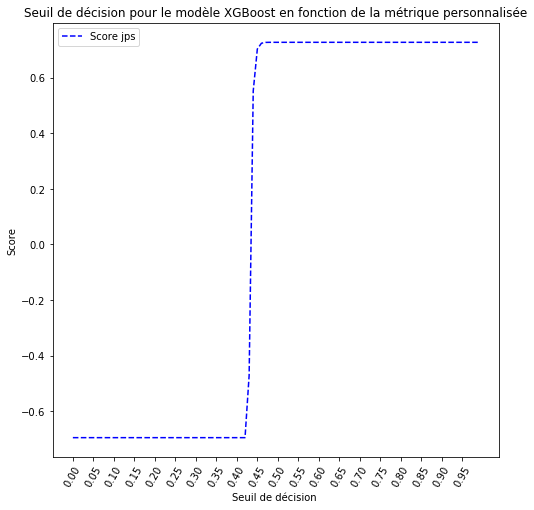

In [35]:
plt.figure(figsize=(8, 8))
plt.title("Seuil de décision pour le modèle " +BestModel +" en fonction de la métrique personnalisée")
plt.plot(thresholds, precisions, "b--", label="Score jps")
plt.ylabel("Score")
plt.xticks(np.arange(0,1, 0.05), rotation=60)
plt.xlabel("Seuil de décision ")
plt.legend(loc='best')

In [36]:
seuil = 0.45

## Interprétabilité du modèle sélectionné

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

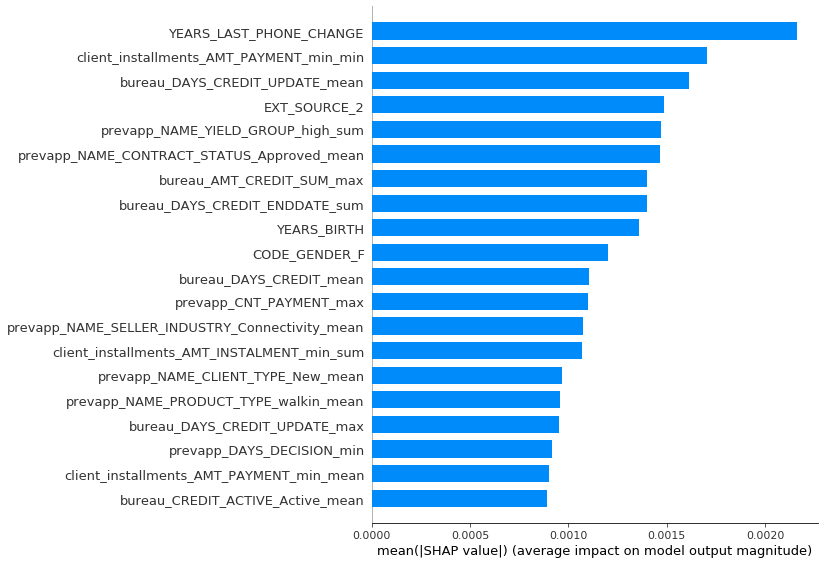

In [37]:
#creation explainer
explainer = shap.TreeExplainer(models[BestModel])
shap_values = explainer.shap_values(x_train)
# visualize the training set predictions
shap.summary_plot(shap_values, x_train, plot_type="bar")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

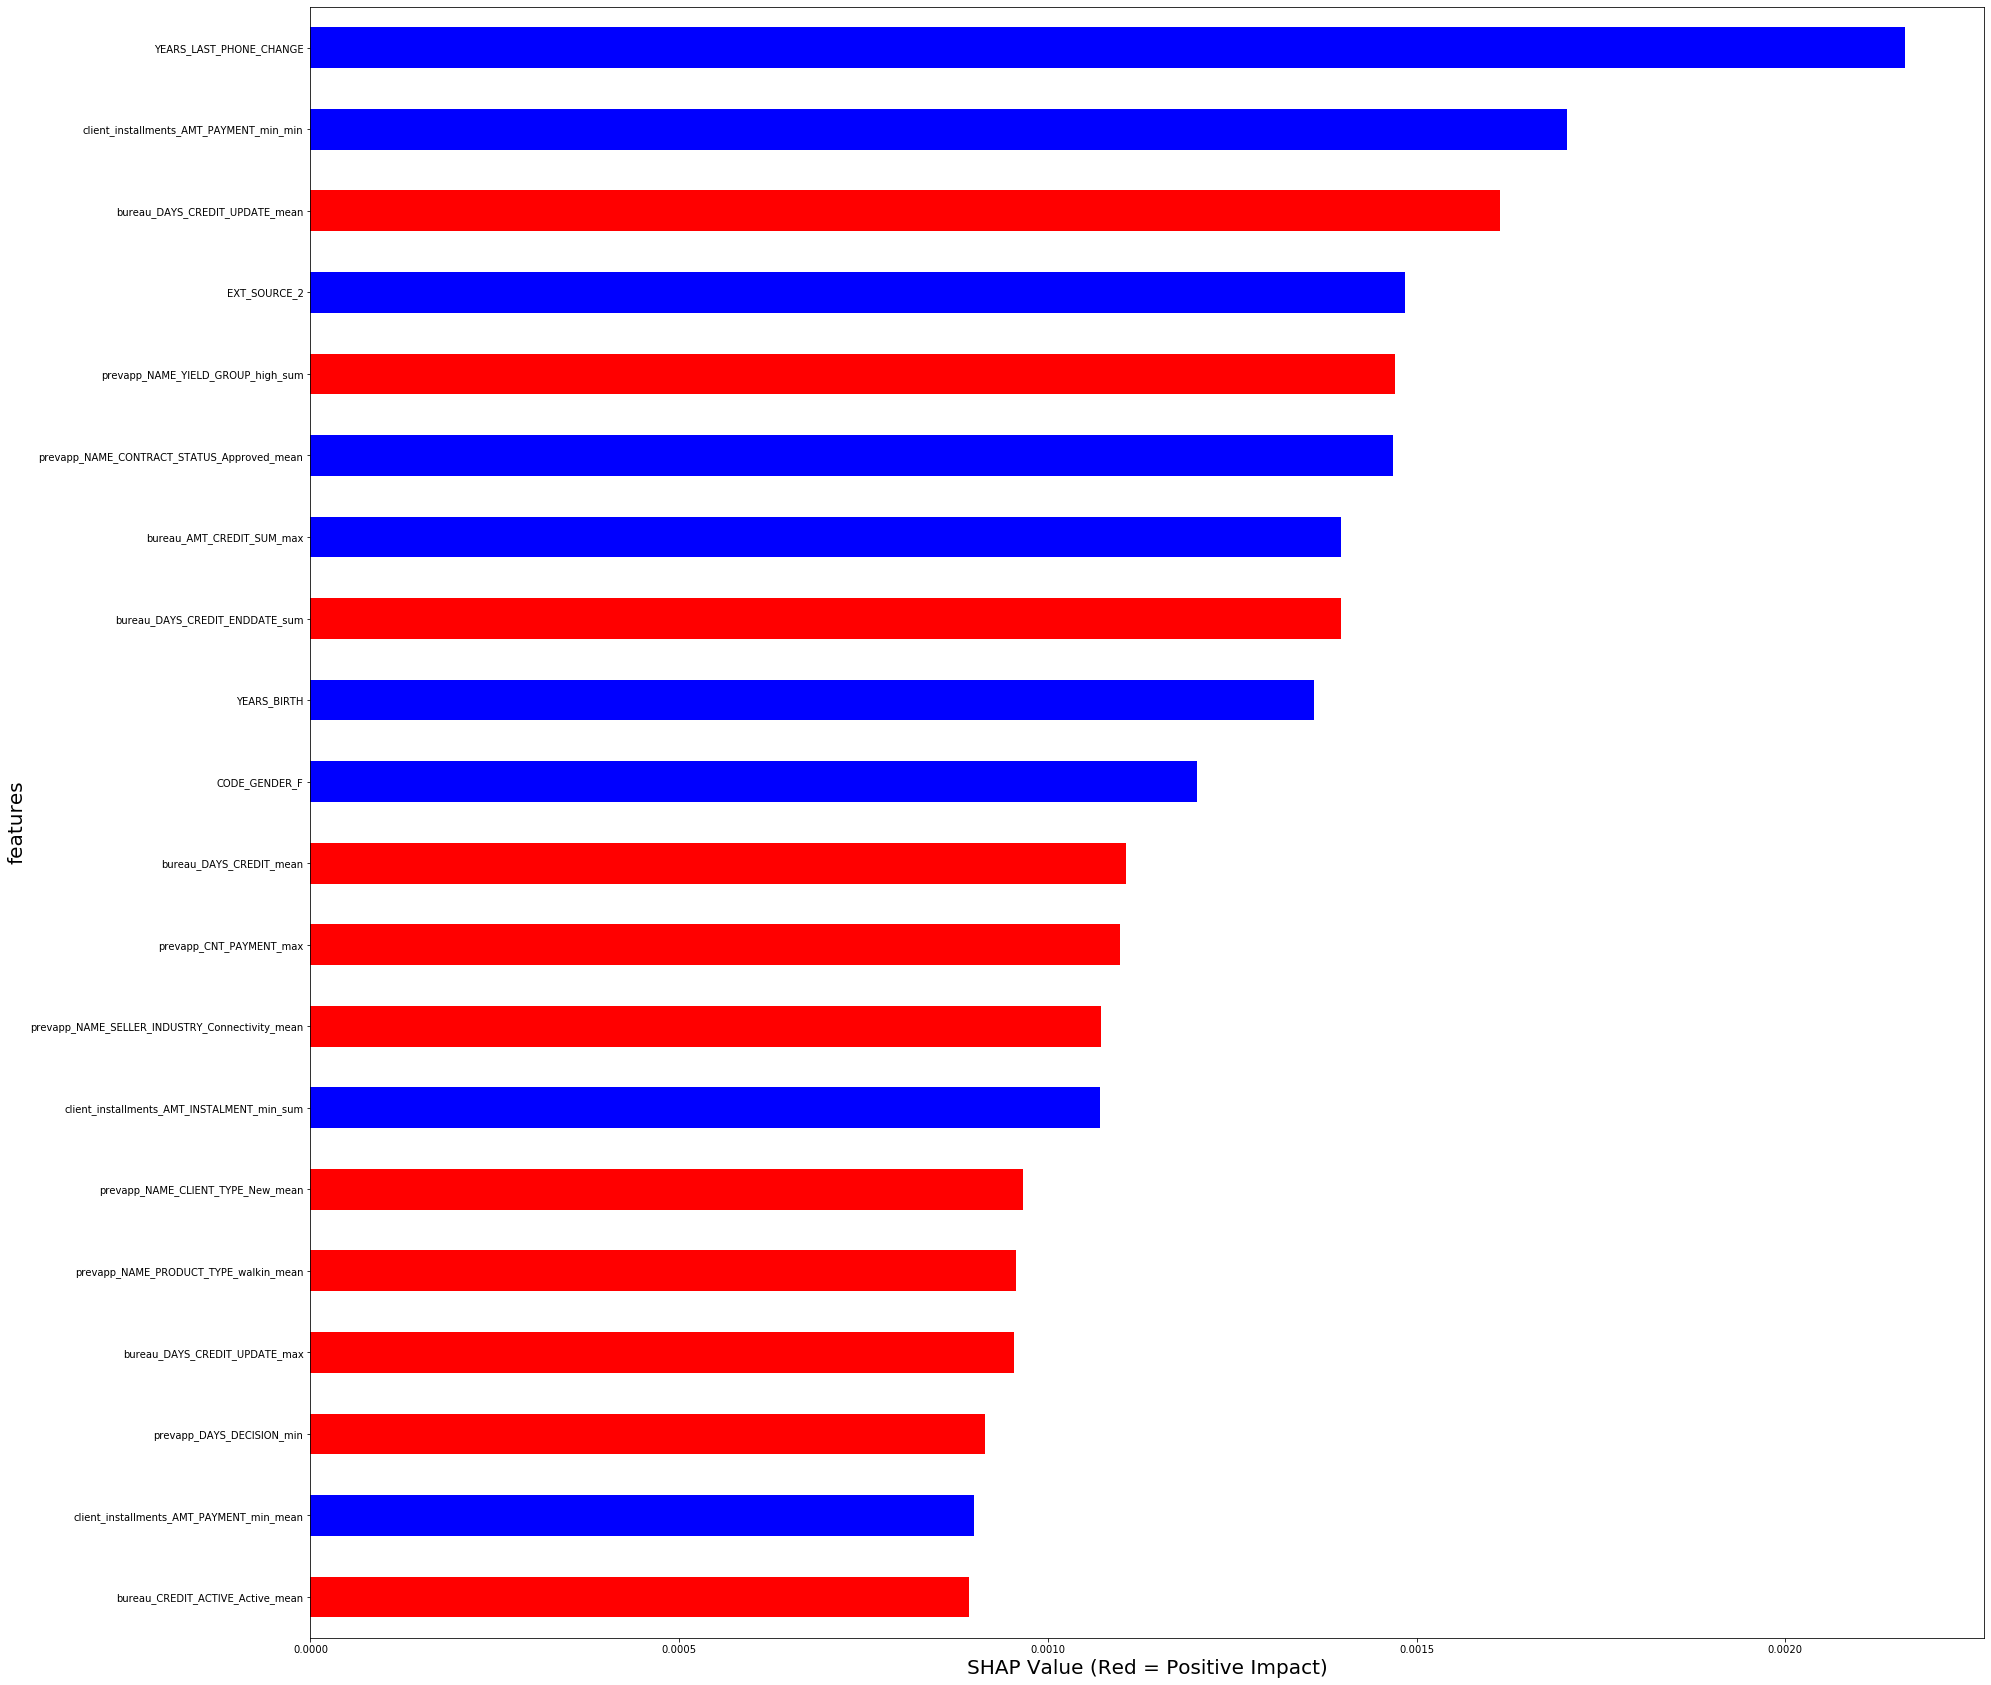

In [38]:
if BestModel == "XGBoost":
    ABS_SHAP(shap_values,x_train,"SK_ID_CURR",20)
else:
    ABS_SHAP(shap_values[1],x_train,"SK_ID_CURR",20)

<IPython.core.display.Javascript object>

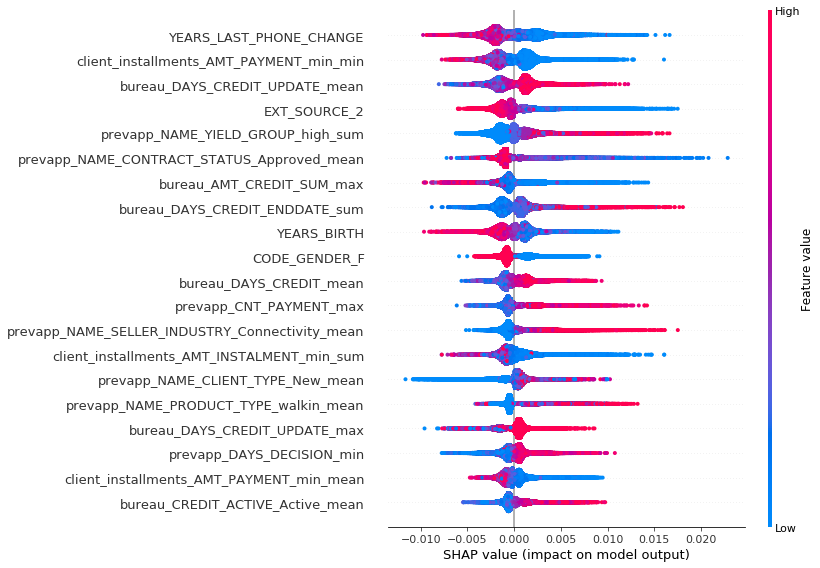

In [39]:
if BestModel == "XGBoost":
    shap.summary_plot(shap_values, x_train)

In [40]:
shap.force_plot(explainer.expected_value, shap_values[0,:], x_train.iloc[0,:])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

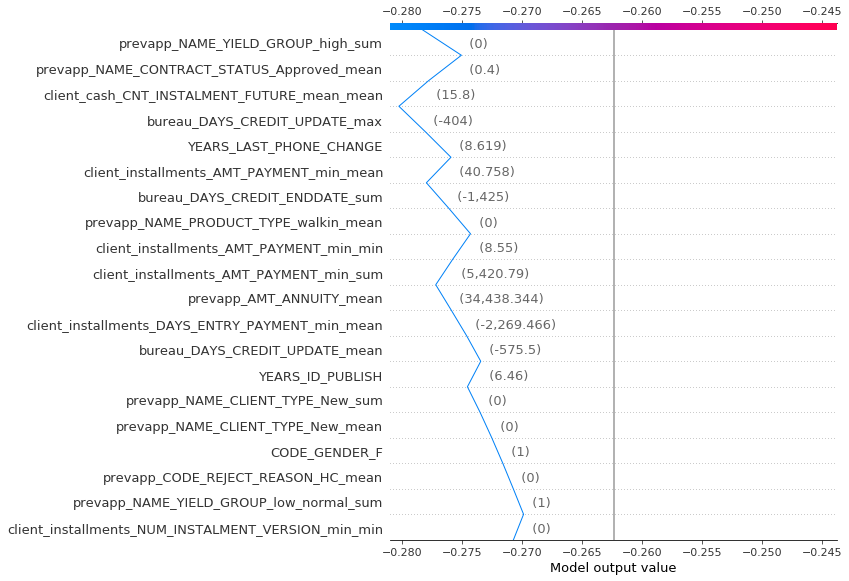

In [41]:
if BestModel == "XGBoost":
    shap.decision_plot(explainer.expected_value, shap_values[0,:], x_train.iloc[0,:])
else:
    shap.decision_plot(explainer.expected_value[1], shap_values[1][0,:], x_train.iloc[0,:])

In [44]:
shap.force_plot(explainer.expected_value, shap_values[:1000,:], x_train1.iloc[:1000,:])

<IPython.core.display.Javascript object>

NameError: name 'x_train1' is not defined

## Exportation jeux de tests et modèle

In [42]:
df_xtest = DATA_FRAME_I["df_test_model_i"].copy()

In [43]:
shap_values_test = explainer.shap_values(df_xtest)

In [44]:
y_predtst = models[BestModel].predict_proba(df_xtest)
y_corrtst = tp.adjusted_classes(y_predtst[:, 1], seuil)
df_xtest["Target"] = y_corrtst
df_xtest["Predict"] = y_predtst[:, 1]

<IPython.core.display.Javascript object>

In [45]:
df_xtest.reset_index(inplace = True)

In [46]:
df_xtest.to_csv('f_xtest_model.csv', index = False)

In [47]:
joblib_file = "joblib_Explainer.bz2"  
joblib.dump(explainer, joblib_file,compress=('bz2', 9))

<IPython.core.display.Javascript object>

['joblib_Explainer.bz2']

In [48]:
print(shap_values_test)

[[ 0.00036198  0.          0.00024824 ...  0.00395381  0.00075457
   0.00077948]
 [-0.00027485  0.          0.00029864 ...  0.00018597  0.00164475
   0.00101198]
 [ 0.00013604  0.          0.00021751 ...  0.00041522 -0.00046946
  -0.00024311]
 ...
 [ 0.00017631  0.          0.00022562 ... -0.00013308  0.00015474
  -0.00013266]
 [ 0.00037844  0.          0.00011718 ... -0.00088939 -0.00087693
  -0.00018994]
 [ 0.00029892  0.          0.00032926 ... -0.00239568 -0.00177353
  -0.00028956]]


In [49]:
df_shap_values = pd.DataFrame(shap_values_test)

<IPython.core.display.Javascript object>

In [50]:
df_shap_values.shape

(48744, 151)

In [51]:
df_shap_values.to_csv('f_shap_values.csv', index = False)